### CUSTOMER CHURN PREDICTON

### BUSINESS UNDERSTANDING
#### 

PROBLEM: A telecom company is experiencing churning in customers and it is looking to build a model to predict the rate of customer churning 

GOAL: To build a machine learning model to predict whether customers will churn or not with the goal of maintaining high customer retention.

#### HYPOTHESIS
**Null Hypothesis (H0)** : There is no likelyhood of customers leaving before three years elapse.

**Alternative Hypothesis(H1)** : There is  likelyhood of customers leaving before three years elapse.

#### ANALYTICAL QUESTION
1. How does method of payment affect churning?
2. Does the type of contract affect rate at which customers leave?
3. What is the impact of monthly charges to customer churning?
4. Does presence of a partner affect likelyhood of churn?
5. What is the relationship of type of internet service and churning?
6. Which gender is churning at a higher rate?
7. From which month of tenure does churning occur frequently?

### DATA UNDERSTANDING

### Notes:
**Our dataset is stored in three separate areas**:
- Our first dataset is the first 3000 records of the dataset and will be found in a database we will have to access remotely


- The second part of the data is hosted on a GitHub Repository. The data is a csv file and we will have to download it


- The final 2000 records of the data set needed for this project will be found in OneDrive. The data is a csv file and we will have to download it. This is the dataset that will be used to test the accuracy of the model

In [1]:
# Data analysis and manipulation packages


# For data manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter

# for database connection
import pyodbc
from dotenv import dotenv_values
import os

import warnings

warnings.filterwarnings("ignore")

# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import randint
import scipy.stats as stats
import statsmodels.api as sm

# Feature Processing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
import random


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values (".env")


# Get the values for the credentials you set in the '.env' file
server = os.getenv("server_name")
database = os.getenv("database_name")
username= os.getenv("user")
password = os.getenv("password")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
connection = pyodbc.connect(connection_string)
print(connection)

In [4]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM dbo.LP2_Telco_churn_first_3000'
data1 = pd.read_sql(query, connection)


In [5]:
# Close connection
connection.close()

In [6]:
# Display the dataframe
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
# Load the CSV file by providing the full path to the CSV file
data_2 = pd.read_csv(r"C:\Users\user\Desktop\churn predictor\Customer-churn-prediction\Data\LP2_Telco-churn-second-2000.csv")

# Display the dataframe
data_2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
data_3 = pd.read_excel(r"C:\Users\user\Desktop\churn predictor\Customer-churn-prediction\Data\Telco-churn-last-2000.xlsx")

# display excel data
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### Organising data into train data set and test data set

#### Train Dataset

In [9]:
# Train data set is the first 2 data set
# concatinate the 2 datasets
train_data = pd.concat([data1, data_2], axis=0, ignore_index=True)

#dispaly Train data
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Test Dataset

In [10]:
# Test data set is the excel file
test_df = data_3

#### Explaratory Data Analysis (E.D.A)

In [11]:
train_data.shape

(5043, 21)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


In [14]:
train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
print ( f"There are {train_data.duplicated().sum()} duplicates in train data set")


There are 0 duplicates in train data set


#### DATA CLEANING

In [16]:
# convert Totalcharge column to numerical 
train_data.TotalCharges = pd.to_numeric(train_data.TotalCharges, errors='coerce')
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [17]:
# Input missing values with the mode
columns_to_replace= ['MultipleLines','OnlineSecurity',
                     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                     'StreamingMovies'
                     ] 

for column in columns_to_replace:
    train_data[column].fillna(train_data[column].mode()[0],inplace=True)
    

In [18]:
# Drop missing value in the churn column
train_data.dropna(subset='Churn',inplace=True)

In [19]:
# Drop rows where tenure = 0
train_data.drop(labels=train_data[train_data['tenure']== 0].index,axis=0, inplace=True)

In [20]:
# checking missing values
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# Create a function to get the columns where False, True, Yes and No are present
def check_column_values(df):
    columns = []
    for column in df.columns:
        unique_values = df[column].astype(str).unique()  # Convert values to strings
        if all(value.lower() in [x.lower() for x in unique_values] for value in ['True', 'False', 'Yes', 'No']):
            columns.append(column)
    return columns
def filtered_target_columns(check_column_values):
    target_columns = check_column_values(train_data)
    return target_columns
target_columns = filtered_target_columns(check_column_values)
target_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [22]:
# Create a function that maps the column values and replaces True with Yes and False with No
def unify_column_values(df,columns):
    for column in columns:
        df[column]=df[column].replace({True:'Yes',False:'No'})
def unified_columns():
    return target_columns
 
unify_column_values(train_data,unified_columns())

In [23]:
# Create a function to print the unified columns and the number of values for each category
def get_clean_target_columns(df, target_columns):
    def clean_target_columns(column):
        return column
    result = {}
    for column in df.columns:
        if column in target_columns:
            column_values = df[column].value_counts()
            column_values.columns = [column, 'count']
            result[clean_target_columns(column)] = column_values
    for column, column_df in result.items():
        print(f"\nColumn: {column}")
        print(column_df)
get_clean_target_columns(train_data, target_columns)


Column: Partner
Partner
No     2583
Yes    2451
Name: count, dtype: int64

Column: Dependents
Dependents
No     3481
Yes    1553
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    4547
No      487
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  2688
Yes                 2126
No phone service     220
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3155
Yes                    1451
No internet service     428
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     2879
Yes                    1727
No internet service     428
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                     2867
Yes                    1739
No internet service     428
Name: count, dtype: int64

Column: TechSupport
TechSupport
No                     3119
Yes                    1487
No internet service     428
Name: count, dtype: int64

Column: StreamingTV
StreamingT

In [24]:
# Save concatenated data to a CSV file
train_data.to_csv("train_data.csv", index=False)


#### Univariate Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

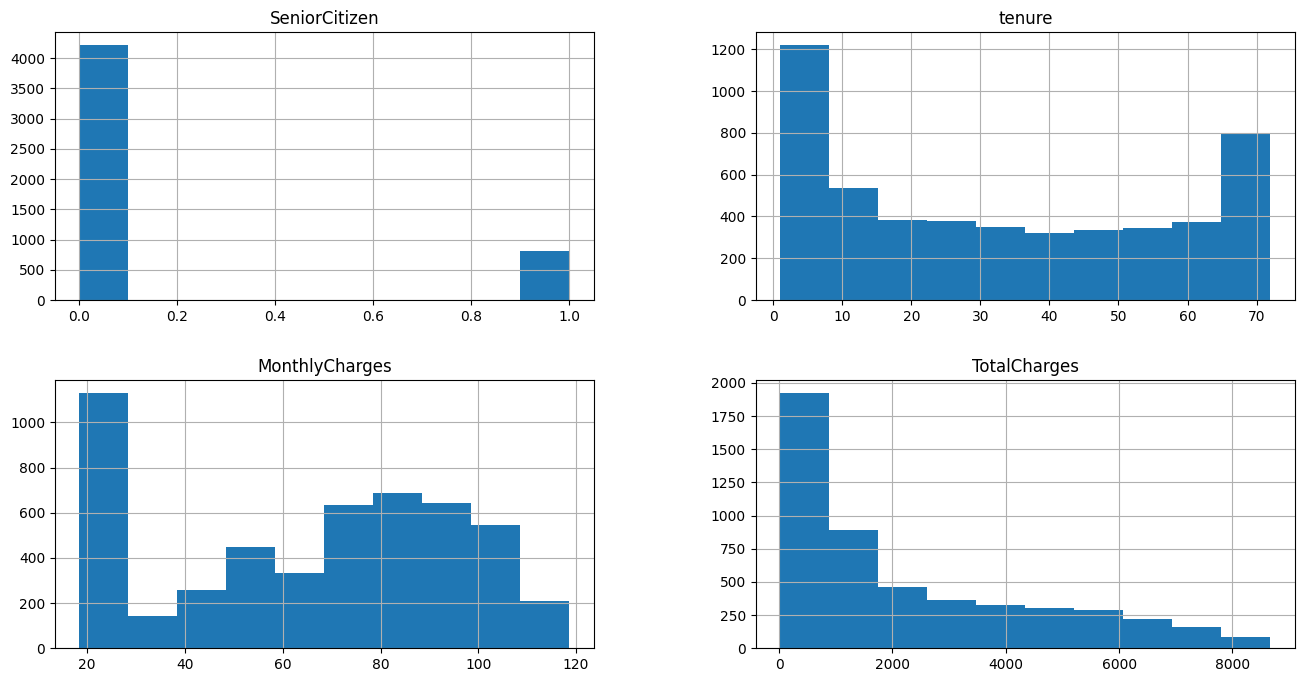

In [25]:
train_data.hist(figsize=(16,8))

### Bivariate analysis

### Churn distribution by monthly charges

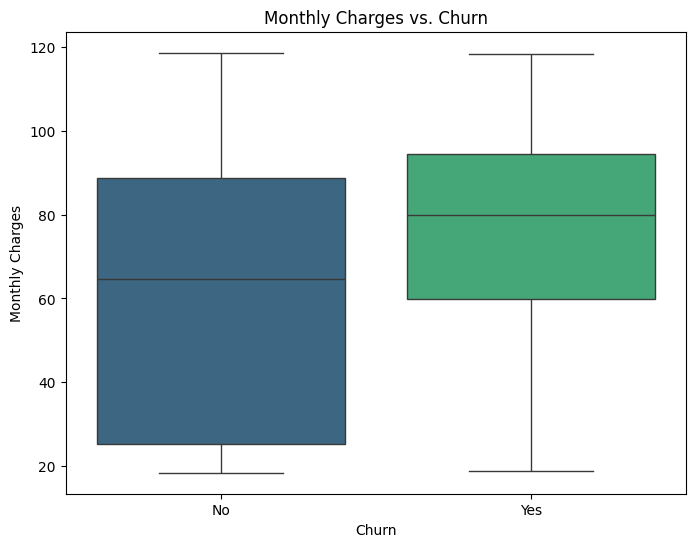

In [26]:
# Reset the index
train_data.reset_index(drop=True, inplace=True)

train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

### churn distribution by partner

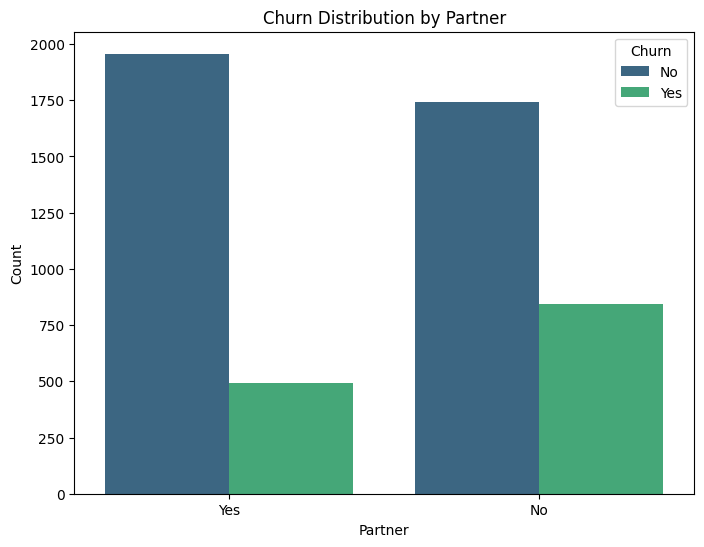

In [27]:
# Replace values in the 'Partner' column

train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=train_data, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Distribution by Partner')
plt.legend(title='Churn', loc='upper right')
plt.show()

### Internet service against churn

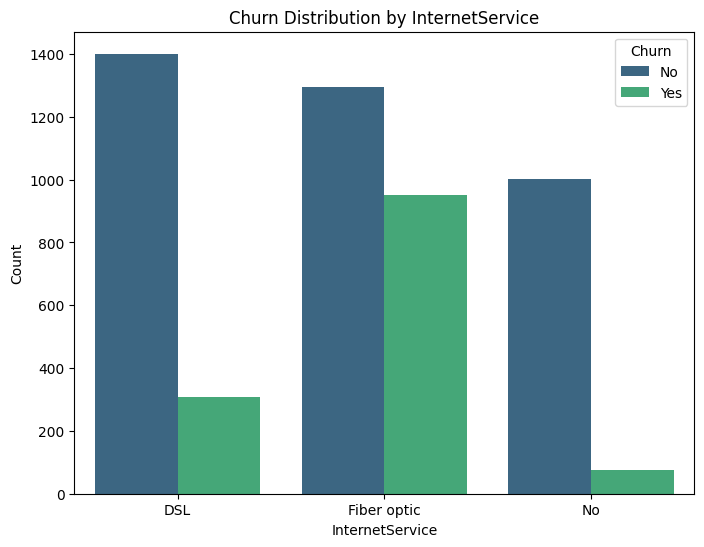

In [28]:
train_data['InternetService'] = train_data['InternetService'].replace({True: 'Yes', False: 'No'})


train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})


plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=train_data, palette='viridis')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Churn Distribution by InternetService')
plt.legend(title='Churn', loc='upper right')
plt.show()

#### Churning vs Tenure

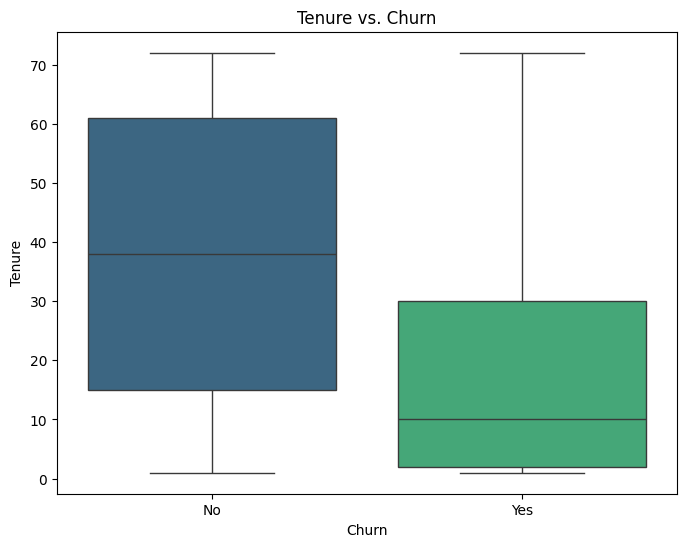

In [29]:
# Reset the index
train_data.reset_index(drop=True, inplace=True)

# Replace True and False with Yes and No in the 'Churn' column
train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure vs. Churn')
plt.show()

**Observation**

- There is a slight difference in the amount of monthly charges between the customers who churned and those who did not.
- Customers with no partners churned more than those with partners
- customers using fiber optic internet service show a high likelyhood of churning
- customers using DSL internet service show a less likelyhood of 
-  customers with longer period of tenure are less likely to churn that those with shorter period of tenure

### Multivariate Analysis

#### churn distriution vs tenure vs monthly charges

In [30]:
# Identify non-numeric columns
non_numeric_cols = train_data.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns
train_data_numeric = train_data.drop(columns=non_numeric_cols)

# Calculate the correlation matrix
corr_matrix = train_data_numeric.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.003816,0.221767,0.095487
tenure,0.003816,1.000000,0.239642,0.826188
MonthlyCharges,0.221767,0.239642,1.000000,0.646813
TotalCharges,0.095487,0.826188,0.646813,1.000000


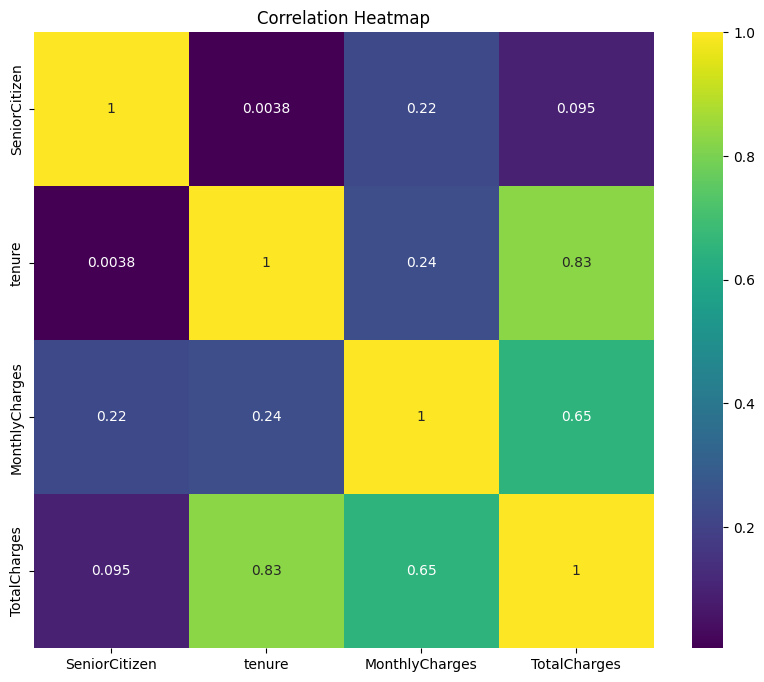

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

- SeniorCitizen and MonthlyCharges have a positive correlation of approximately 0.22. This suggests that there is a weak positive relationship between being a senior citizen and higher monthly charges

- Tenure and MonthlyCharges have a positive correlation of approximately 0.25. This indicates that there is a weak positive relationship between longer tenure and higher monthly charges

### Hypothesis Testing

**Null Hypothesis (H0)** : There is no likelyhood of customers leaving before three years elapse.
 
**Alternative Hypothesis(H1)** : There is  likelyhood of customers leaving before three years elapse.

In [32]:
# Create a subset of the DataFrame with 'churn' and 'tenure' columns
churn_tenure = train_data[['Churn', 'tenure']]

# Separate tenure values for churned and non-churned customers
churned_tenure = churn_tenure[churn_tenure['Churn'] == 'Yes']['tenure']
non_churned_tenure = churn_tenure[churn_tenure['Churn'] == 'No']['tenure']

# Perform two-sample independent t-test assuming equal variances
t_statistic, p_value = stats.ttest_ind(churned_tenure, non_churned_tenure, equal_var=True)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results of the t-test
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in tenure between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in tenure between churned and non-churned customers.")
print(f'The p-value is {p_value}')
print(f'The t-statistic is {t_statistic}')

Reject the null hypothesis. There is a significant difference in tenure between churned and non-churned customers.
The p-value is 2.543980226346796e-147
The t-statistic is -26.73190873796306


### Answering Analytical Questions

##### 1. How does method of payment affects churning?

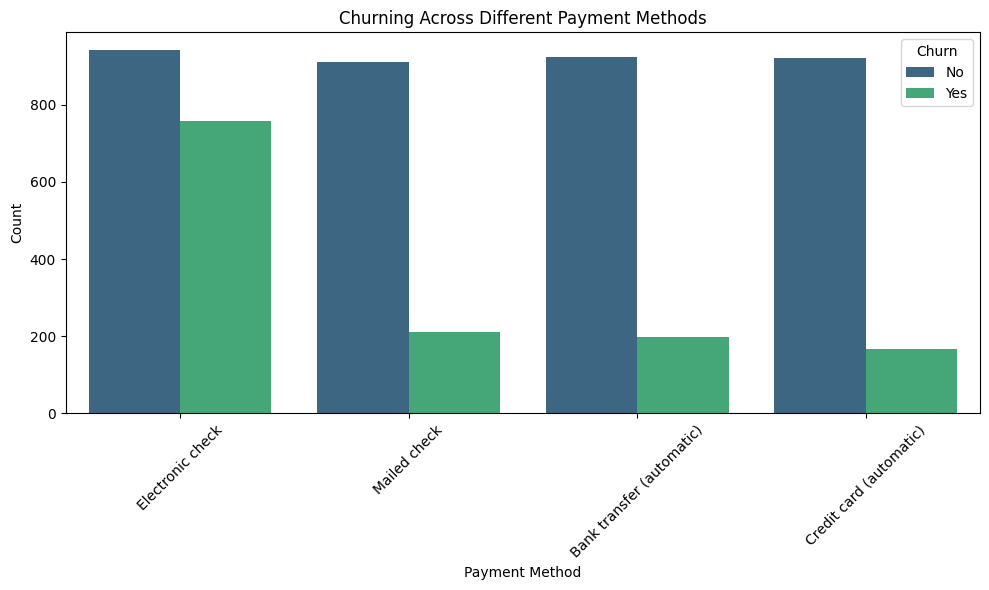

In [33]:
# countplot showing rate of churning across payment methods
plt.figure(figsize =(10, 6))
sns.countplot(data = train_data, x='PaymentMethod', hue ='Churn', palette= 'viridis')
plt.title('Churning Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

##### 2. Does the type of contract affect rate at which customers leave?

<Figure size 1000x600 with 0 Axes>

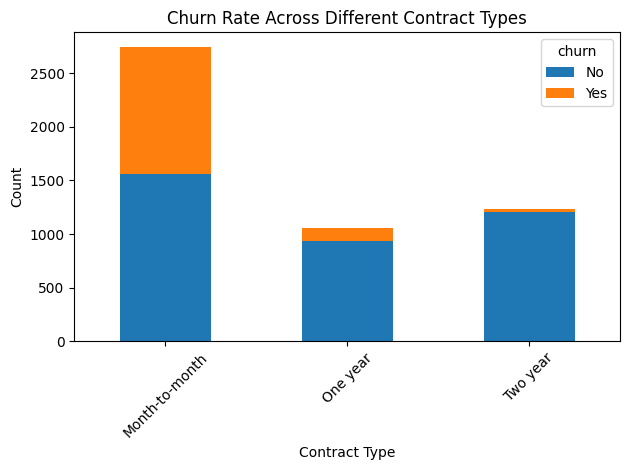

In [34]:
# Group the data by 'Contract' and 'Churn', and count the occurrences
contract_churn_counts = train_data.groupby(['Contract', 'Churn']).size().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='churn', loc='upper right')
plt.tight_layout()
plt.show()

### __3. What is the impact of monthly charges to customer churning?__ #####

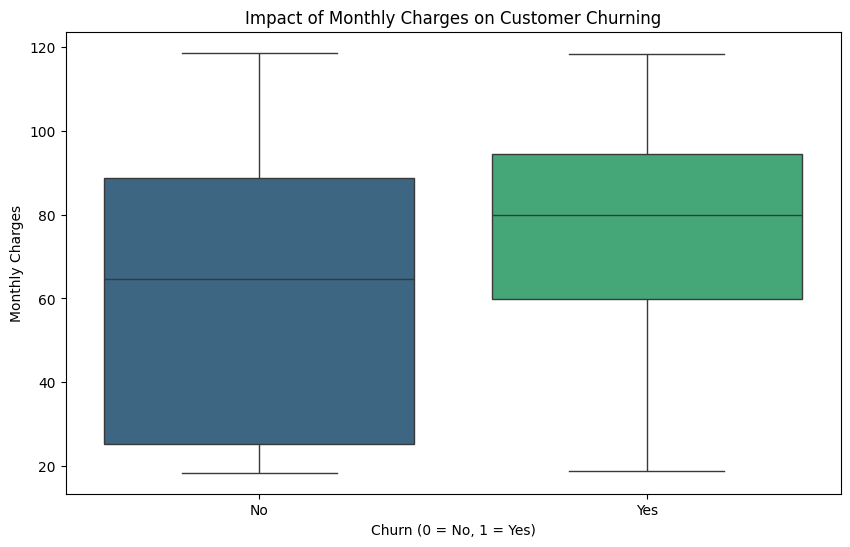

In [35]:
# Create a box plot of monthly charges by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x ='Churn', y ='MonthlyCharges', data = train_data, palette='viridis')
plt.title('Impact of Monthly Charges on Customer Churning')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

##### __4. Does presence of a partner affect likelyhood of churn?__ #####

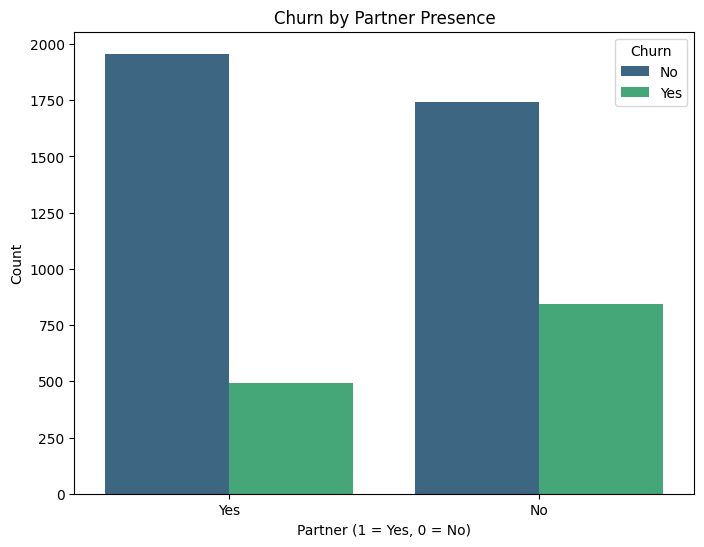

In [36]:
# countplot for churn by partner presence
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=train_data , palette='viridis')
plt.title('Churn by Partner Presence')
plt.xlabel('Partner (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

##### __5. What is the relationship of type of internet service and churning?__ #####

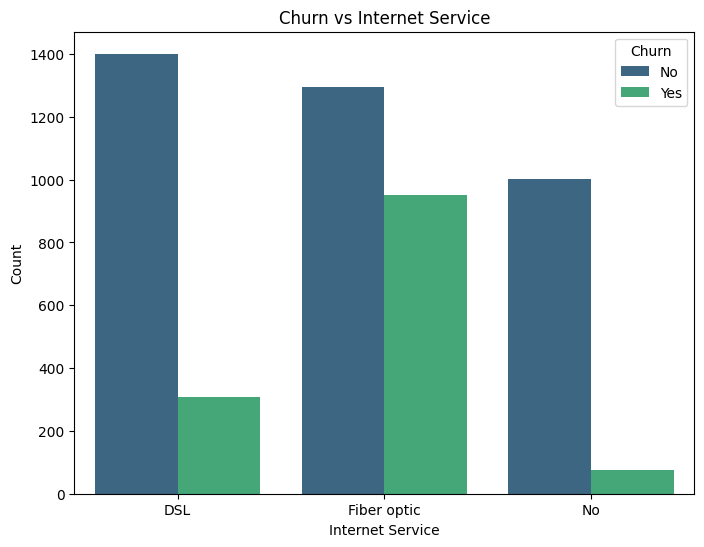

In [37]:
 #Barplots to show relationshp of churn vs. internet service 
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data = train_data ,palette = 'viridis')
plt.title('Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

##### __6. Which gender is churning at a higher rate?__ #####

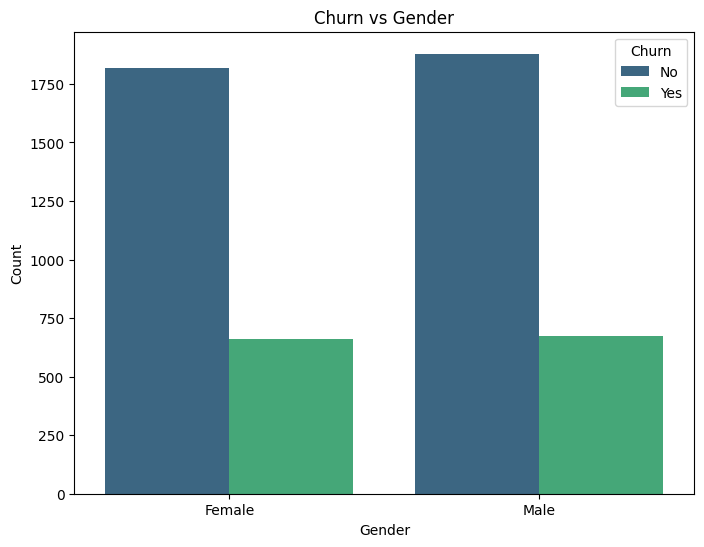

In [38]:
# Barplots to show rate of churn for Gender 
plt.figure(figsize=(8, 6))
sns.countplot(x = 'gender', hue ='Churn', data=train_data, palette = 'viridis')
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**Observations**
- Level of churning was varying across the payment methods with electronic check having the highest churn followed by mailed check, bank transfer and credit card respectively. The higher churn rate among customers using electronic check may indicate that these payment methods are associated with certain service-related issues or customer experience challenges
- The type of contract is a significant predictor of churn as it varies across. Customers contracts of month-to-month had the highest level of churn, followed by contracts of one-year and two-year respectively.This indicates that contract length plays a significant role in customer retention, with long-term commitments generally associated with lower churn rates.
- The average monthly charge for churned customers is higher than for non-churned customers.This implies that, on average, customers who churned had higher monthly charges. The higher churn rate among customers with higher monthly charges may indicate dissatisfaction with the quality of services, customer support, or overall experience despite paying more.
- Customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This suggests that the type of internet service may impact customer satisfaction and retention.
- There is no significant difference in churn between male and female customers. Churn rates seem comparable across gender groups, indicating that gender may not be a strong predictor of churn in this dataset.
- The rate of churn was high for customers with no partners compared to customers with partners. This implies that married customers may perceive higher benefits from the services, influencing their decision to stay with the provide

## Feature Engineering

### Encoding categorical variables

#### i. Train Data

In [39]:
# Performing one-hot encoding on selected categorical columns in the train dataset using the pd.get_dummies() function
# The drop_first=True parameter is is used to drop the first category in each encoded column to avoid multicollinearity. 
train_data_encoded = pd.get_dummies(train_data[['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService',
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                            'PaperlessBilling', 'PaymentMethod']], drop_first=True)

train_data_encoded.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [40]:
# Create a new DataFrame 'int_df' containing numeric columns from the train dataset
train_int_df = train_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# Display the 'int_df' DataFrame
train_int_df

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.850000,29.850000,No
1,34,56.950001,1889.500000,No
2,2,53.849998,108.150002,Yes
3,45,42.299999,1840.750000,No
4,2,70.699997,151.649994,Yes
...,...,...,...,...
5029,24,84.800000,1990.500000,No
5030,72,103.200000,7362.900000,No
5031,11,29.600000,346.450000,No
5032,4,74.400000,306.600000,Yes


In [41]:
# Conduct horizontal concantenation using the axis=1 parameter to join the two dataframes into the final train dataset
train_df_final = pd.concat([train_data_encoded, train_int_df], axis=1)
train_df_final.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,1,29.850000,29.850000,No
1,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,34,56.950001,1889.500000,No
2,0,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,2,53.849998,108.150002,Yes
3,0,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,45,42.299999,1840.750000,No
4,0,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,2,70.699997,151.649994,Yes


### ii. Test Data

In [42]:
# Performing one-hot encoding on selected categorical columns in the test dataset using the pd.get_dummies() function
# The drop_first=True parameter is is used to drop the first category in each encoded column to avoid multicollinearity. 
test_data_encoded = pd.get_dummies(test_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                            'PaperlessBilling', 'PaymentMethod']], drop_first=True)

test_data_encoded.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,False,True,False,True,True,False,False,...,False,True,False,False,False,False,True,False,True,False
1,0,True,False,False,True,False,False,False,True,True,...,True,False,True,False,False,False,False,False,False,True
2,0,True,False,False,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False
3,0,True,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4,0,True,True,True,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True


In [43]:
# Create a new DataFrame 'int_df' containing numeric columns from the train dataset
test_int_df = test_df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Display the 'int_df' DataFrame
test_int_df

,tenure,MonthlyCharges,TotalCharges
0,12,84.45,1059.55
1,9,20.40,181.8
2,27,81.70,2212.55
3,27,79.50,2180.55
4,1,89.15,89.15
...,...,...,...
1995,7,75.10,552.95
1996,47,74.05,3496.3
1997,2,44.70,93.7
1998,62,110.75,7053.35


In [44]:
# Conduct horizontal concantenation using the axis=1 parameter to join the two dataframes into the final train dataset
test_data_final = pd.concat([test_data_encoded, test_int_df], axis=1)
test_data_final.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,True,False,False,True,False,True,True,False,False,...,False,False,False,True,False,True,False,12,84.45,1059.55
1,0,True,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,True,9,20.40,181.8
2,0,True,False,False,True,False,False,False,False,False,...,True,True,False,False,False,True,False,27,81.70,2212.55
3,0,True,False,True,True,False,True,True,False,False,...,False,False,False,True,False,True,False,27,79.50,2180.55
4,0,True,True,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,1,89.15,89.15


### Modelling

#### Splitting The Train and Test into the X and y variables

In [45]:
# Handle missing values in train_df_final and test_data_final
train_df_final.dropna(inplace=True)
test_data_final.dropna(inplace=True)

# Split the train DataFrame into features (X_train) and target variable (y_train)
X_train = train_df_final.drop('Churn', axis=1)
y_train = train_df_final['Churn']

# Assign X_test
X_test = test_data_final

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the X and y into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [46]:
# Check the size of the training and evaluation sets with the shape() function:
(X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape), (X_test.shape)

(((4027, 30), (4027,)), ((1007, 30), (1007,)), (2000, 30))

### Feature Scaling

In [47]:
# Create an instance of the MinMaxScaler and set the feature range to (0, 1)
mms = MinMaxScaler(feature_range=(0, 1))

# Select the columns to be scaled
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply feature scaling to the training features (X_train)
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = mms.fit_transform(X_train[columns_to_scale])

# Apply feature scaling to the evaluation features (X_eval)
X_eval_scaled = X_eval.copy()
X_eval_scaled[columns_to_scale] = mms.transform(X_eval[columns_to_scale])

# Convert the scaled training features back into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled)

# Convert the scaled evaluation features back into a DataFrame
X_eval_scaled = pd.DataFrame(X_eval_scaled)

### Balancing The Dataset Using SMOTE

In [48]:
# Create an instance of the SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

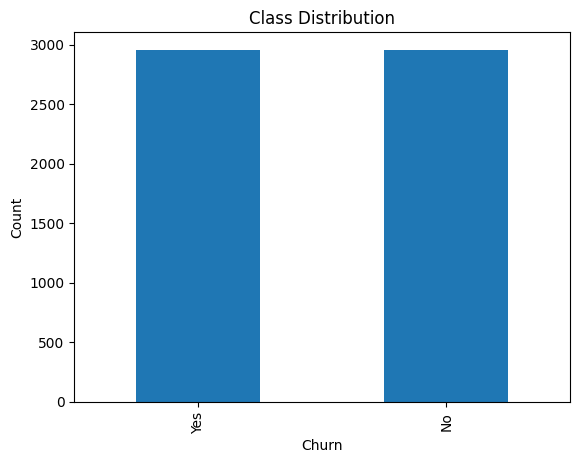

In [49]:
# Count the occurrences of each class in the balanced dataset
class_counts = y_train_balanced.value_counts()

# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Model Training and Evaluation

In [50]:
# Initialize an empty dictionary named 'Results' to store the evaluation results for different models.
Results = {'Model':[], 'Acurracy':[], 'Precision':[], 'Recall':[], 'F1':[]}

In [51]:
# Converting the dictionary Results into a pandas DataFrame.
Results = pd.DataFrame(Results)
Results.head()

,Model,Acurracy,Precision,Recall,F1


In [52]:
# Machine Learning Models Initialization
# Logistic Regression
lr = LogisticRegression()

# Random Forest
rf = RandomForestClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Gaussian Naive Bayes
nb = GaussianNB()

# Support Vector Machine
svm = SVC()


In [53]:
# Set a random seed
np.random.seed(42)
random.seed(42)

# Initialize an empty list to store results
results_list = []

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 
          'Gradient Boosting Classifier', 'Gaussian Naive Bayes', 'Support Vector Machine']

# Fit the models and evaluate the performance
for model_name, model in zip(models, [lr, rf, knn, dt, gb, nb, svm]):
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_eval_scaled)

    print('Model:', model_name)
    print('===' * 18)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_eval, y_pred))
    print('Classification Report:')
    print(classification_report(y_eval, y_pred, target_names=['No', 'Yes']))
    print('Accuracy:', round(accuracy_score(y_eval, y_pred), 2))
    print('Precision:', round(precision_score(y_eval, y_pred, pos_label='Yes'), 2))
    print('Recall:', round(recall_score(y_eval, y_pred, pos_label='Yes'), 2))
    print('F1:', round(f1_score(y_eval, y_pred, pos_label='Yes'), 2))
    print()
    
    # Create a dictionary with the model name and the evaluation results    
    result_dict = {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_eval, y_pred), 2),
        'Precision': round(precision_score(y_eval, y_pred, pos_label='Yes'), 2),
        'Recall': round(recall_score(y_eval, y_pred, pos_label='Yes'), 2),
        'F1': round(f1_score(y_eval, y_pred, pos_label='Yes'), 2)
    }
    
    # Append the dictionary to the list
    results_list.append(result_dict)

# Convert the list of dictionaries to a DataFrame
Results = pd.DataFrame(results_list)

# Print the results
Results


Model: Logistic Regression
Confusion Matrix:
[[567 173]
 [ 62 205]]
Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.77      0.83       740
         Yes       0.54      0.77      0.64       267

    accuracy                           0.77      1007
   macro avg       0.72      0.77      0.73      1007
weighted avg       0.81      0.77      0.78      1007

Accuracy: 0.77
Precision: 0.54
Recall: 0.77
F1: 0.64



Model: Random Forest
Confusion Matrix:
[[612 128]
 [ 92 175]]
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.83      0.85       740
         Yes       0.58      0.66      0.61       267

    accuracy                           0.78      1007
   macro avg       0.72      0.74      0.73      1007
weighted avg       0.79      0.78      0.79      1007

Accuracy: 0.78
Precision: 0.58
Recall: 0.66
F1: 0.61

Model: K-Nearest Neighbors
Confusion Matrix:
[[520 220]
 [ 75 192]]
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.70      0.78       740
         Yes       0.47      0.72      0.57       267

    accuracy                           0.71      1007
   macro avg       0.67      0.71      0.67      1007
weighted avg       0.77      0.71      0.72      1007

Accuracy: 0.71
Precision: 0.47
Recall: 0.72
F1: 0.57

Model: Decision Tree
Confusion Matrix:
[[566 174]
 [101 166]]


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.77,0.54,0.77,0.64
1,Random Forest,0.78,0.58,0.66,0.61
2,K-Nearest Neighbors,0.71,0.47,0.72,0.57
3,Decision Tree,0.73,0.49,0.62,0.55
4,Gradient Boosting Classifier,0.78,0.56,0.78,0.65
5,Gaussian Naive Bayes,0.63,0.41,0.90,0.57
6,Support Vector Machine,0.76,0.54,0.75,0.63


In [54]:
# Convert columns to float type
Results['F1'] = Results['F1'].astype(float)

# Find the index of the maximum value in each score 
max_f1 = Results['F1'].idxmax()

# Print the model with the best accuracy, precision, recall and f1 score
print("Best F1 Model:", Results.loc[max_f1]['Model'])

Best F1 Model: Gradient Boosting Classifier


In [55]:
# Fit the model and check for errors/warnings
gb.fit(X_train_balanced, y_train_balanced)


GradientBoostingClassifier()

In [56]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5  # You can adjust the number of folds as needed

# Create a stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Now, you can perform cross-validation using `skf` as the cross-validator
scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')

# Round the scores to two decimal places
rounded_scores = [round(score, 2) for score in scores]

print("Cross-Validation Scores (Accuracy):")
print(rounded_scores)


Cross-Validation Scores (Accuracy):
[0.85, 0.84, 0.85, 0.84, 0.83]


In [57]:
# Importing necessary libraries
from sklearn.metrics import precision_score, recall_score

# Perform cross-validation and calculate the F1 scores manually
f1_scores = []
for train_index, test_index in skf.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_test_fold = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
    y_train_fold, y_test_fold = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]
    
    model = rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    
    precision = precision_score(y_test_fold, y_pred_fold, pos_label='Yes', zero_division=1)
    recall = recall_score(y_test_fold, y_pred_fold, pos_label='Yes', zero_division=1)
    
    if precision == 0 and recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    f1_scores.append(f1)

# Round the scores to two decimal places
rounded_scores = [round(score, 2) for score in f1_scores]

print("Cross-Validation Scores (F1):")
print(rounded_scores)


Cross-Validation Scores (F1):
[0.86, 0.84, 0.85, 0.84, 0.83]


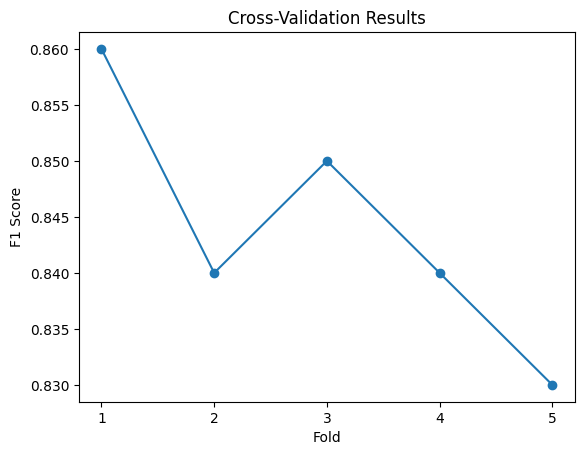

In [58]:
# F1 scores obtained from cross-validation
f1_scores = (rounded_scores)

# Plot the F1 scores
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Cross-Validation Results')
plt.xticks(range(1, len(f1_scores) + 1))
plt.show()

### Hyperparameter tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Define the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=5, scoring='f1', n_iter=10)
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Perform cross-validation again with best parameters and print F1 scores for each fold
best_estimator = random_search.best_estimator_
cv_results = cross_val_score(best_estimator, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
print('F1 Scores for Each Fold:', cv_results)

# Compute the F1 score manually for the best estimator
y_pred = best_estimator.predict(X_train_balanced)
manual_f1_score = f1_score(y_train_balanced, y_pred, pos_label='Yes')
print('Manually Computed F1 Score:', manual_f1_score)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
F1 Scores for Each Fold: [nan nan nan nan nan]
Manually Computed F1 Score: 0.9317507418397626


In [62]:
# Create a new instance of the Random Forest model with tuned hyperparameters
gb_tuned = RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=300)

# Fit the tuned Random Forest model and evaluate its performance
gb_tuned.fit(X_train_balanced, y_train_balanced)
y_pred_gb_tuned = gb_tuned.predict(X_eval_scaled)

print('Gradient boosting classifier (Tuned Hyperparameters)')
print('===' * 18)

print('Confusion Matrix:')
print(confusion_matrix(y_eval, y_pred_gb_tuned))
print('Classification Report:')
print(classification_report(y_eval, y_pred_gb_tuned))
print('Accuracy:', round(accuracy_score(y_eval, y_pred_gb_tuned), 2))
print('Precision:', round(precision_score(y_eval, y_pred_gb_tuned, pos_label='Yes'), 2))
print('Recall:', round(recall_score(y_eval, y_pred_gb_tuned, pos_label='Yes'), 2))
print('F1:', round(f1_score(y_eval, y_pred_gb_tuned, pos_label='Yes'), 2))


Gradient boosting classifier (Tuned Hyperparameters)
Confusion Matrix:
[[599 141]
 [ 82 185]]
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.81      0.84       740
         Yes       0.57      0.69      0.62       267

    accuracy                           0.78      1007
   macro avg       0.72      0.75      0.73      1007
weighted avg       0.80      0.78      0.78      1007

Accuracy: 0.78
Precision: 0.57
Recall: 0.69
F1: 0.62


#### Saving the model

In [65]:
import pickle

# Define the key components
key_components = {
    'model': gb_tuned, 
    'best_params': {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300},
    'best_score': 0.93
}

# Save the key components in a file using pickle
with open('gb_key_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)


#### Predict on Test_df

In [79]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select the relevant columns for feature scaling
test_columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Select only the relevant columns from the test data for feature scaling
X_test_scaled = test_data_final[test_columns_to_scale].copy()

# Apply feature scaling to the test features using the same scaler as used for training data
X_test_scaled = mms.transform(X_test_scaled)

# Determine the number of times to repeat the features to match the expected number of features
num_repeats = 10  # Adjust this based on your specific requirements

# Repeat the test data features along the columns axis
X_test_scaled_extended = np.tile(X_test_scaled, (1, num_repeats))

# Predict churn on the test dataset using the gb_tuned model
test_data_final['Churn_Predicted'] = gb_tuned.predict(X_test_scaled_extended)

# Print the predicted churn values
print(test_data_final.head(10))


   SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0              0         True        False           False              True   
1              0         True        False           False              True   
2              0         True        False           False              True   
3              0         True        False            True              True   
4              0         True         True            True              True   
5              1        False        False           False              True   
6              1         True        False           False              True   
7              1        False        False           False              True   
8              0        False        False           False              True   
9              0         True        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                           False               True   
1      

In [81]:
# Get the true churn values from the evaluation set
true_churn = y_eval

# Get the predicted churn values from the dataset
predicted_churn = test_data_final['Churn_Predicted'].iloc[:len(y_eval)]

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(true_churn, predicted_churn)
confusion_matrix

array([[716,  24],
       [259,   8]], dtype=int64)

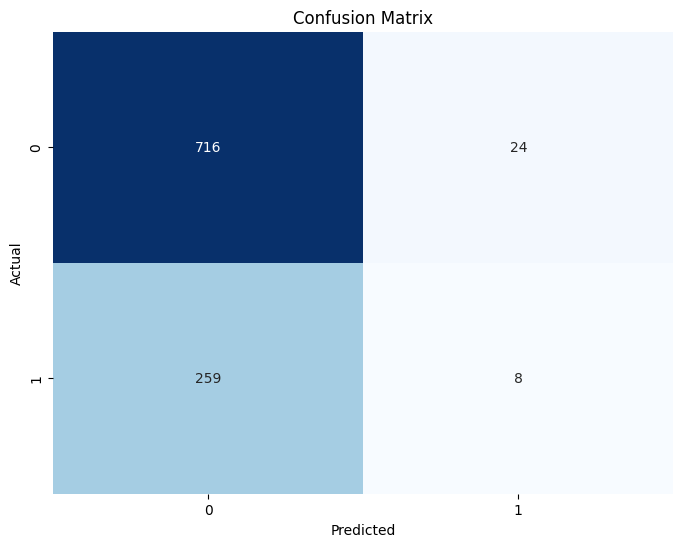

In [82]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a visual representation of the model's predictions and their actual values. It shows the number of instances that fall into each category based on the model's predictions.

True Negative (TN): 716 - This indicates the number of instances that are correctly predicted as non-churn (0) by the model.

False Positive (FP): 24 - This indicates the number of instances that are incorrectly predicted as churn (1) by the model when they are actually non-churn.

False Negative (FN): 259 - This indicates the number of instances that are incorrectly predicted as non-churn (0) by the model when they are actually churn.

True Positive (TP): 8 - This indicates the number of instances that are correctly predicted as churn (1) by the model.

These values provide insights into the model's performance in predicting churn. For example, there are 716 true negatives, which means the model accurately predicted 716 instances as non-churn. On the other hand, there are 24 false positives, indicating instances that were predicted as churn but are actually non-churn. Similarly, there are 259 false negatives, indicating instances that were predicted as non-churn but are/were actually churn. Lastly, there are 8 true positives, meaning the model correctly predicted 8 instances as churn.

**Conclusion and Recommendations**

Based on the analysis of the telco company's customer churn data, several key insights and recommendations can be drawn to improve customer retention:

i. Pricing Strategy Review and adjust monthly charges to ensure competitiveness in the market and offer value-added services to customers, particularly those with higher monthly charges.

ii. Fiber Optic Internet Service Improve the quality and reliability of fiber optic internet service to reduce churn among customers using this service.

iii. Partner Status Develop targeted marketing and retention strategies for customers without a partner, such as family plans or promotions that encourage adding additional lines.

iv. Tenure Focus on providing an excellent customer experience during the early stages of customer tenure to increase loyalty and reduce early churn.

v. Demographic Considerations Expand marketing efforts to target underrepresented customer segments, such as female customers, ensuring inclusivity and relevance in services and promotions.

vi. Value-added Services Emphasize the benefits of online security, backup, device protection, and tech support services to customers and consider offering bundled packages or discounts.

vii. Loyalty Rewards Offer loyalty rewards, personalized offers, and long-term